# <center>COST OF LIVING IN CITIES

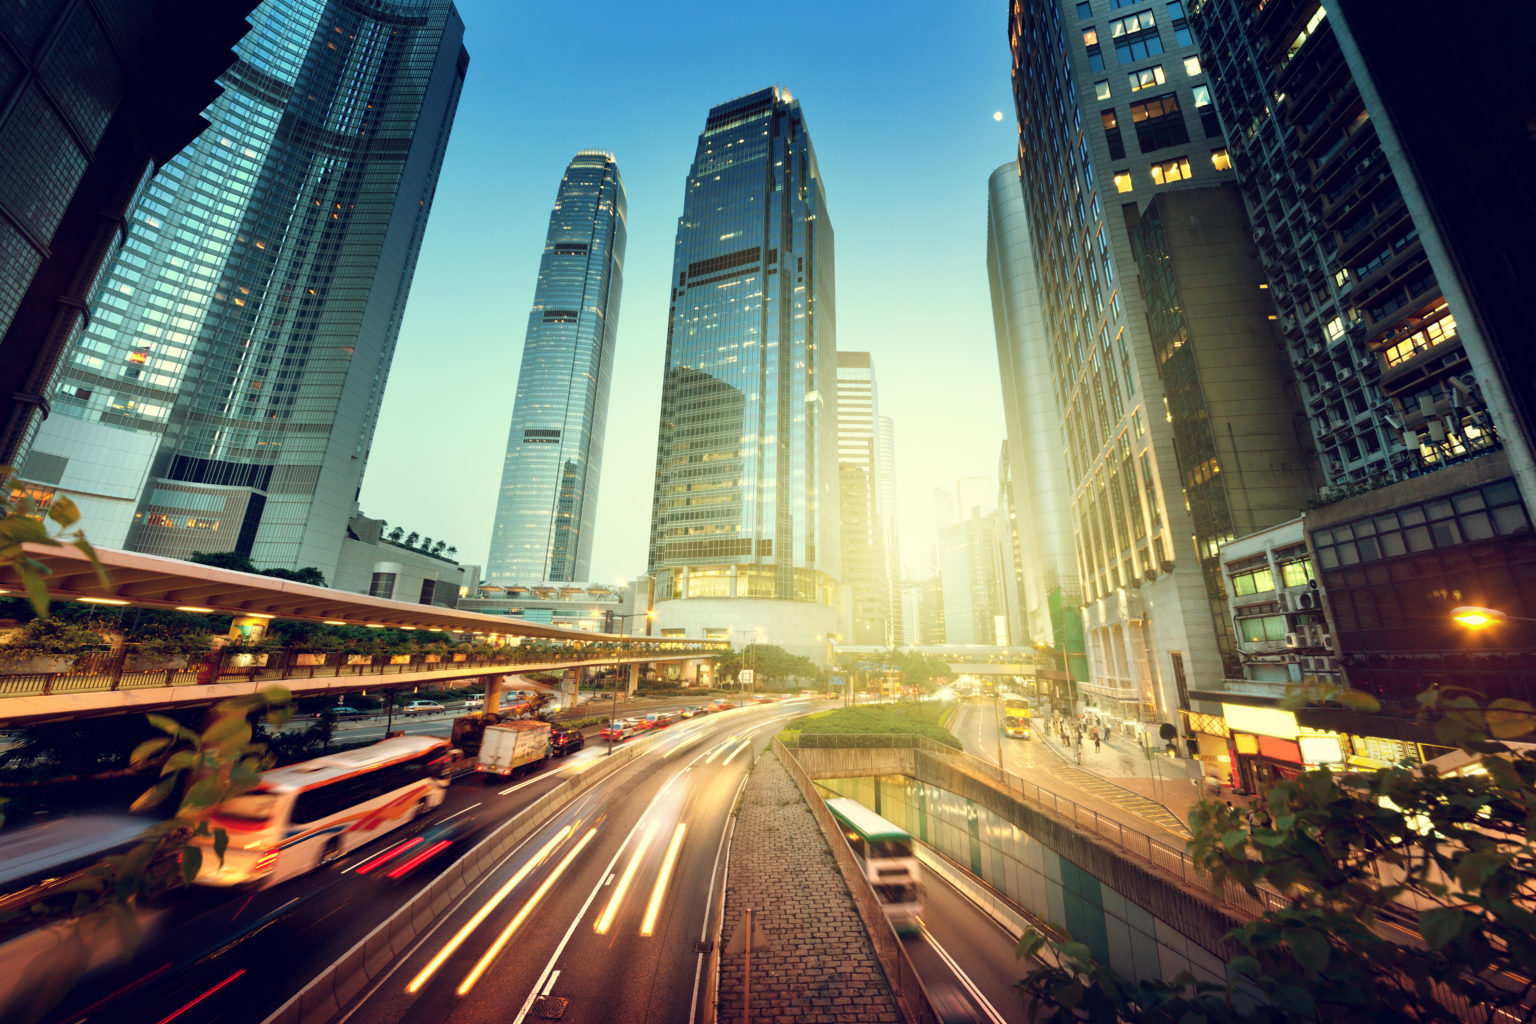

## About dataset

This dataset contains living index details of 536 cities of the world.The data has been downloded from kaggle dataset company

## Description of attributes

### Rank :- 
Rankings of the cities
### City :-
Name of the cities
### Cost of living index:-
A theoretical price index that measures relative cost of living over time or regions.
### Rent index:-
It is an estimation of prices of renting apartments in the city
### Cost of Living Plus Rent Index:-
It is an estimation of consumer goods prices including rent in the cities.
### Groceries Index:-
Groceries Index is an estimation of grocery prices in a given location.
### Restaurant Price Index:-
It is an estimation of restaurant expands in a given city.
### Local Purchasing Power Index:-
it shows relative purchasing power in buying goods and services in a given city for the average wage in that city.


## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR

In [2]:
df=pd.read_csv("Cost_of_living_index.csv")  # data file reading

In [3]:
df   # data loading

Rank                       City  Cost of Living Index  Rent Index  \
0       1          Hamilton, Bermuda                137.56      103.03   
1       2        Zurich, Switzerland                128.65       62.62   
2       3         Basel, Switzerland                126.89       46.14   
3       4      Lausanne, Switzerland                119.62       50.35   
4       5          Bern, Switzerland                118.42       39.22   
..    ...                        ...                   ...         ...   
531   532            Vadodara, India                 22.28        3.78   
532   533               Kochi, India                 21.73        5.45   
533   534       Visakhapatnam, India                 21.52        4.26   
534   535         Navi Mumbai, India                 19.30        4.70   
535   536  Thiruvananthapuram, India                 19.26        4.69   

     Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
0                            121.21           126.56                  151.77   
1                             97.39           127.35                  127.14   
2                             88.66           120.44                  129.10   
3                             86.83           116.35                  122.83   
4                             80.93           114.54                  114.86   
..                              ...              ...                     ...   
531                           13.52            22.26                   14.43   
532                           14.02            21.93                   12.20   
533                           13.35            21.09                   17.09   
534                           12.39            19.21                   12.55   
535                           12.36            18.14                   11.93   

     Local Purchasing Power Index  
0                          114.19  
1                          142.39  
2                          141.48  
3                          132.58  
4                          115.48  
..                            ...  
531                         74.59  
532                         73.42  
533                         55.47  
534                        138.06  
535                         68.15  

[536 rows x 8 columns]

# <CENTER>Exploratory Data Analysis</CENTER>

In [4]:
df.info()   # datatypes checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            536 non-null    int64  
 1   City                            536 non-null    object 
 2   Cost of Living Index            536 non-null    float64
 3   Rent Index                      536 non-null    float64
 4   Cost of Living Plus Rent Index  536 non-null    float64
 5   Groceries Index                 536 non-null    float64
 6   Restaurant Price Index          536 non-null    float64
 7   Local Purchasing Power Index    536 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 33.6+ KB


In [5]:
df.describe() #Checking statistical analysis of numerical values 

Rank  Cost of Living Index  Rent Index  \
count  536.000000            536.000000  536.000000   
mean   268.500000             57.187575   25.209851   
std    154.874142             19.984921   16.453828   
min      1.000000             19.260000    3.430000   
25%    134.750000             39.370000   11.687500   
50%    268.500000             61.970000   23.095000   
75%    402.250000             70.865000   33.440000   
max    536.000000            137.560000  106.490000   

       Cost of Living Plus Rent Index  Groceries Index  \
count                      536.000000       536.000000   
mean                        42.050485        49.758209   
std                         17.457656        19.320901   
min                         12.360000        18.010000   
25%                         26.647500        31.497500   
50%                         44.450000        51.570000   
75%                         53.095000        62.757500   
max                        121.210000       127.350000   

       Restaurant Price Index  Local Purchasing Power Index  
count              536.000000                    536.000000  
mean                54.684851                     89.492668  
std                 25.092353                     37.038404  
min                 11.930000                      2.240000  
25%                 31.550000                     56.792500  
50%                 59.405000                     94.105000  
75%                 72.342500                    119.500000  
max                151.770000                    186.000000

In [6]:
df.isnull().mean()*100 # null value checking

Rank                              0.0
City                              0.0
Cost of Living Index              0.0
Rent Index                        0.0
Cost of Living Plus Rent Index    0.0
Groceries Index                   0.0
Restaurant Price Index            0.0
Local Purchasing Power Index      0.0
dtype: float64

In [7]:
df.duplicated().sum()  # duplicates checking

0

# <center> UNIVARIATE ANALYSIS

### HISTOGRAM

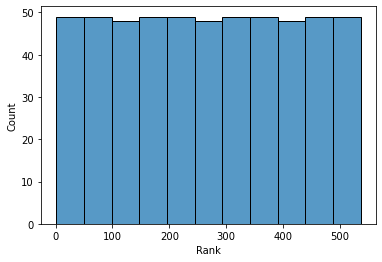

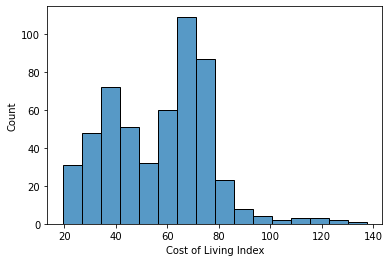

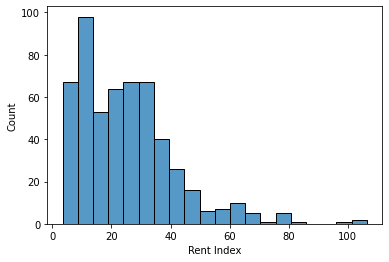

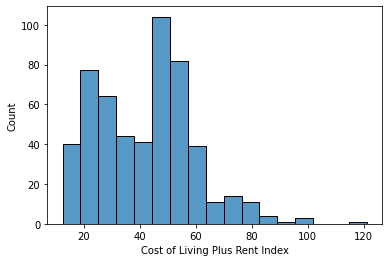

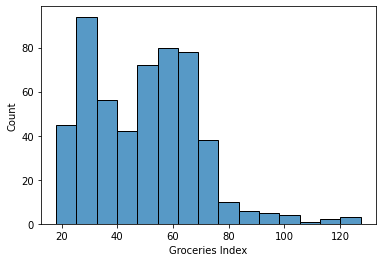

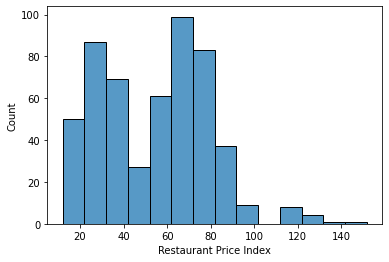

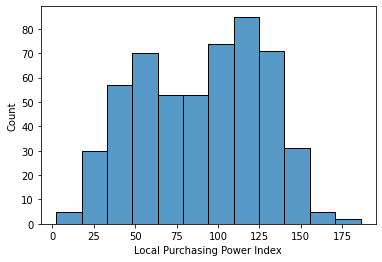

In [8]:
#To check whether it is uniform distribution (freequency) or not
for i in df.columns:
    if df[i].dtype!='object':
        sns.histplot(x=df[i])
        plt.show();

# KDE PLOT

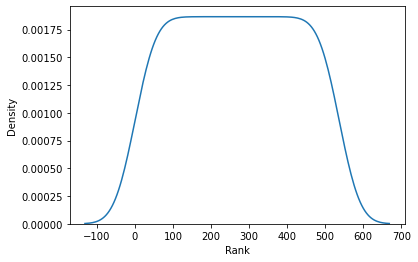

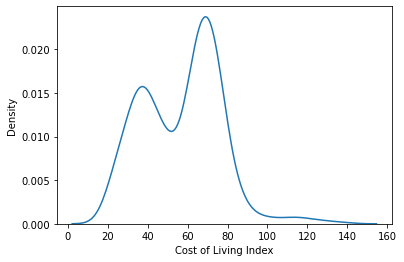

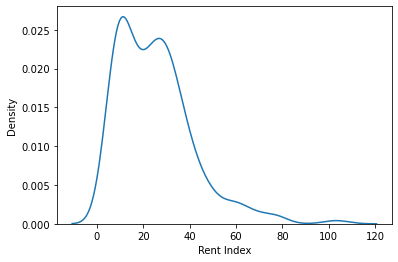

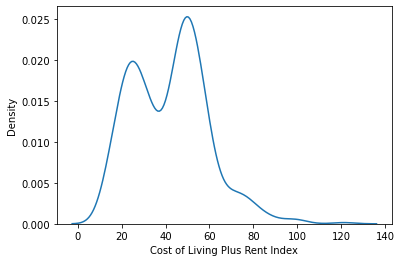

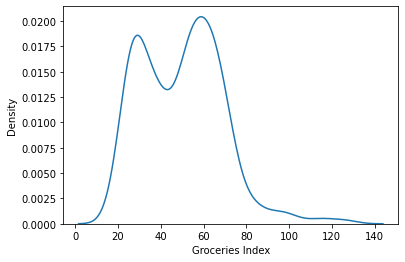

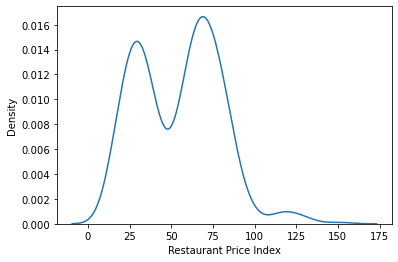

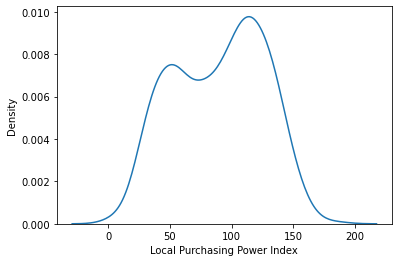

In [9]:
#To check whether it is uniform distribution (Density) or not

for i in df.columns:
    if df[i].dtype!='object':
        sns.kdeplot(x=df[i])
        plt.show();

# BOXPLOT

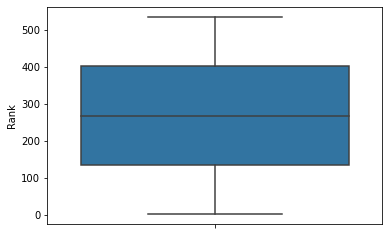

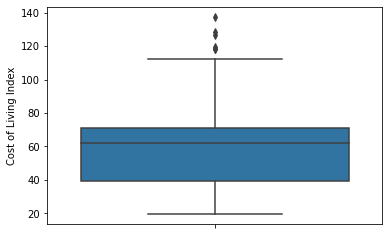

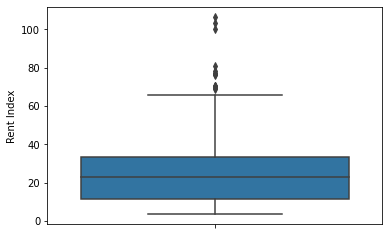

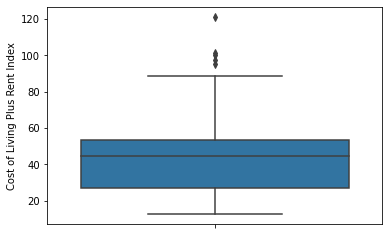

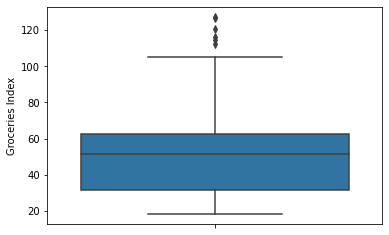

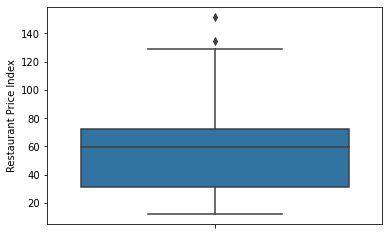

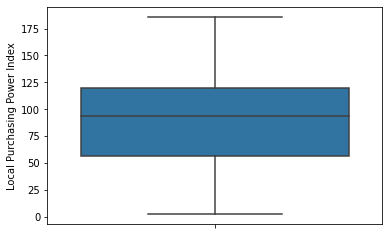

In [10]:
#Shows how the data is distributed and it also shows any outliers
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i])
        plt.show();

# <CENTER> MULTIVARIATE ANALYSIS

# BARPLOTS

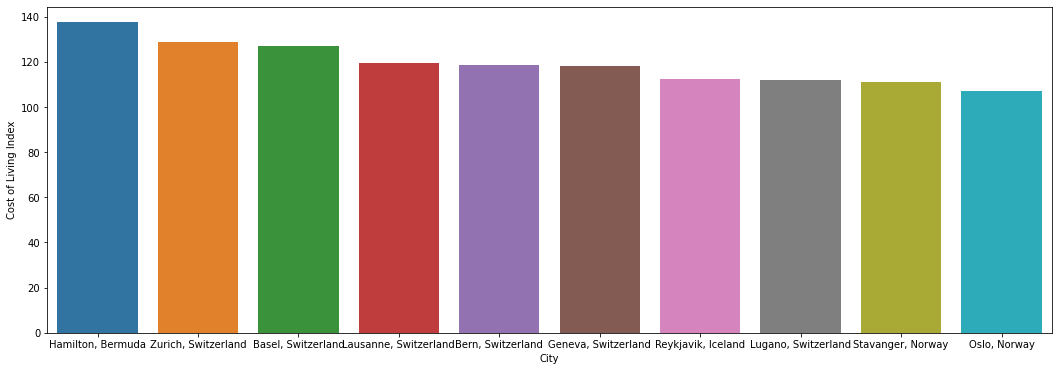

In [11]:
plt.figure(figsize=(18, 6))
sns.barplot(x='City', y="Cost of Living Index", data=df.sort_values(by='Cost of Living Index', ascending=False)[:10]);

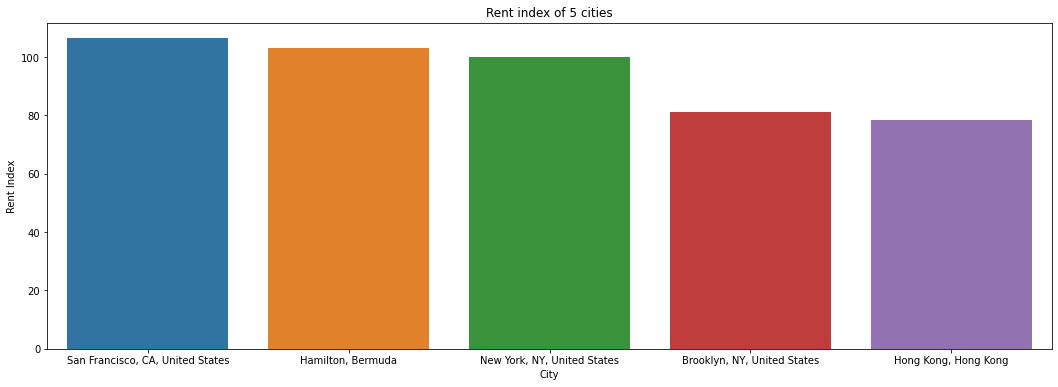

In [12]:
plt.figure(figsize=(18, 6))
sns.barplot(x='City', y="Rent Index", data=df.sort_values(by='Rent Index', ascending=False)[:5]).set(title='Rent index of 5 cities');

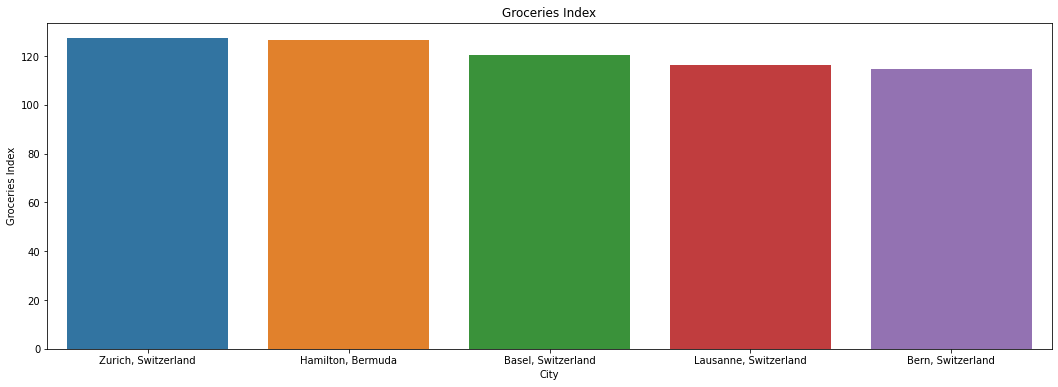

In [13]:
plt.figure(figsize=(18, 6))
sns.barplot(x='City', y="Groceries Index", data=df.sort_values(by='Groceries Index', ascending=False)[:5]).set(title='Groceries Index');

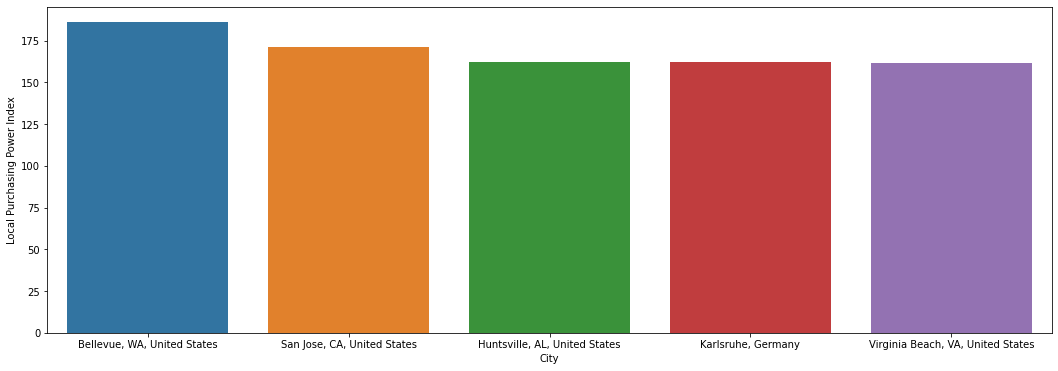

In [14]:
plt.figure(figsize=(18, 6))
sns.barplot(x='City', y="Local Purchasing Power Index", data=df.sort_values(by='Local Purchasing Power Index', ascending=False)[:5]);

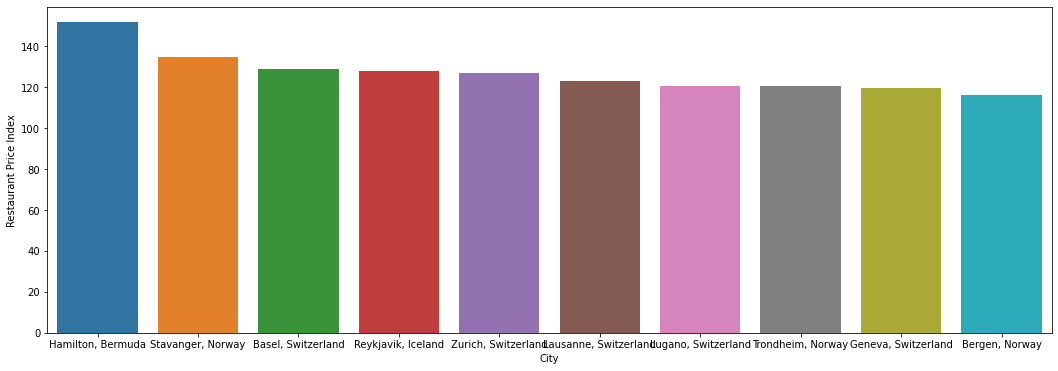

In [15]:
plt.figure(figsize=(18, 6))
sns.barplot(x='City', y="Restaurant Price Index", data=df.sort_values(by='Restaurant Price Index', ascending=False)[:10]);

# SUBPLOTS

Rank                                 AxesSubplot(0.125,0.125;0.0945122x0.755)
Cost of Living Index              AxesSubplot(0.238415,0.125;0.0945122x0.755)
Rent Index                        AxesSubplot(0.351829,0.125;0.0945122x0.755)
Cost of Living Plus Rent Index    AxesSubplot(0.465244,0.125;0.0945122x0.755)
Groceries Index                   AxesSubplot(0.578659,0.125;0.0945122x0.755)
Restaurant Price Index            AxesSubplot(0.692073,0.125;0.0945122x0.755)
Local Purchasing Power Index      AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

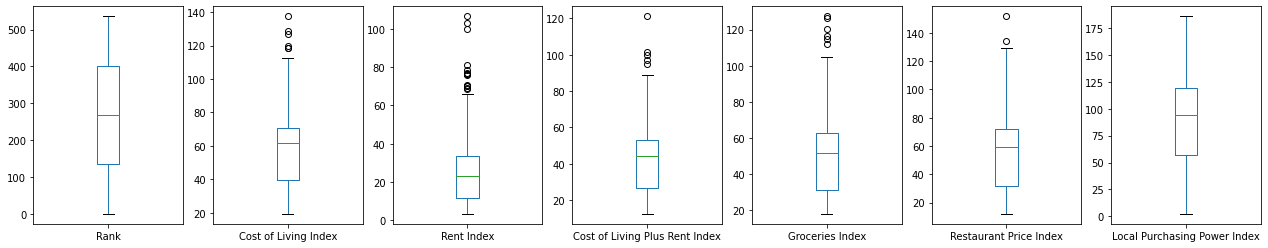

In [16]:
df.plot.box(figsize=(22,4),subplots=True)

## LINEPLOT

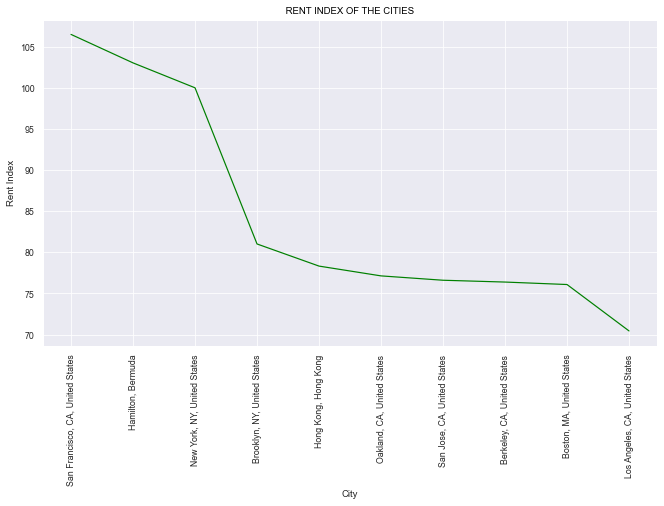

In [17]:
plt.figure(figsize=(11,6))
sns.set_style('dark')
sns.set_theme('paper')
sns.lineplot(x='City',y='Rent Index',data=df.sort_values(by='Rent Index',ascending=False)[:10],color='green')
plt.xticks(rotation=90)
plt.title((' RENT INDEX OF THE CITIES '),color='black')
plt
plt.show()

## PAIRPLOT

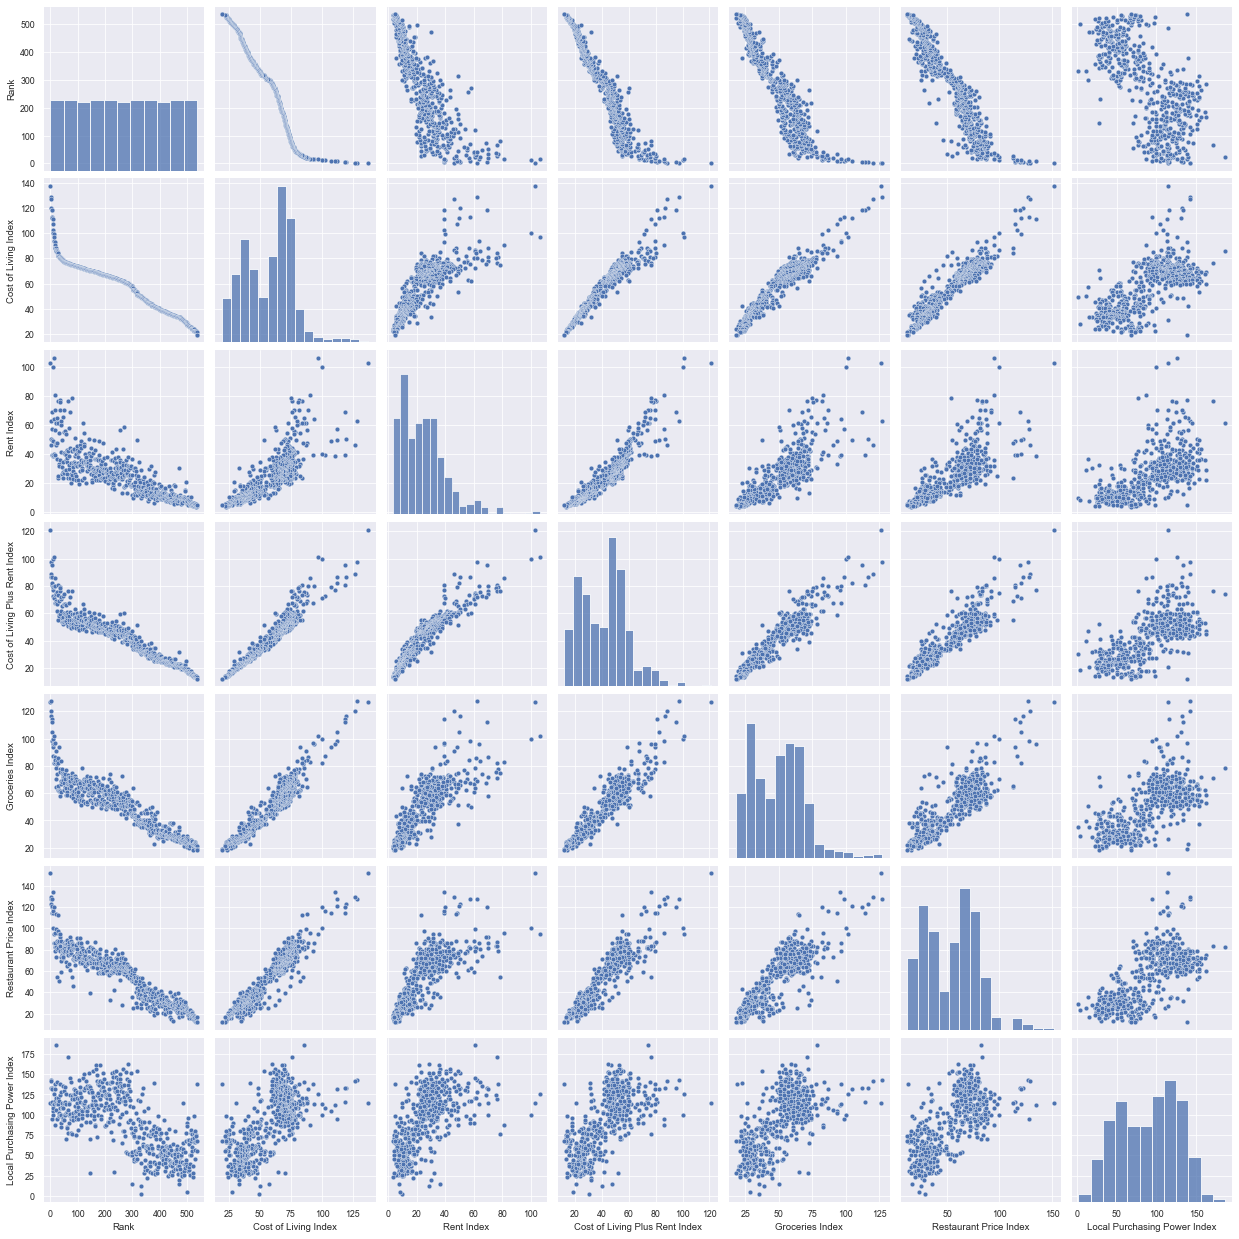

In [18]:
#A pairwise relationships between different  variables in a dataset
sns.pairplot(data=df)
plt.show();

### LINEPLOT

<AxesSubplot:>

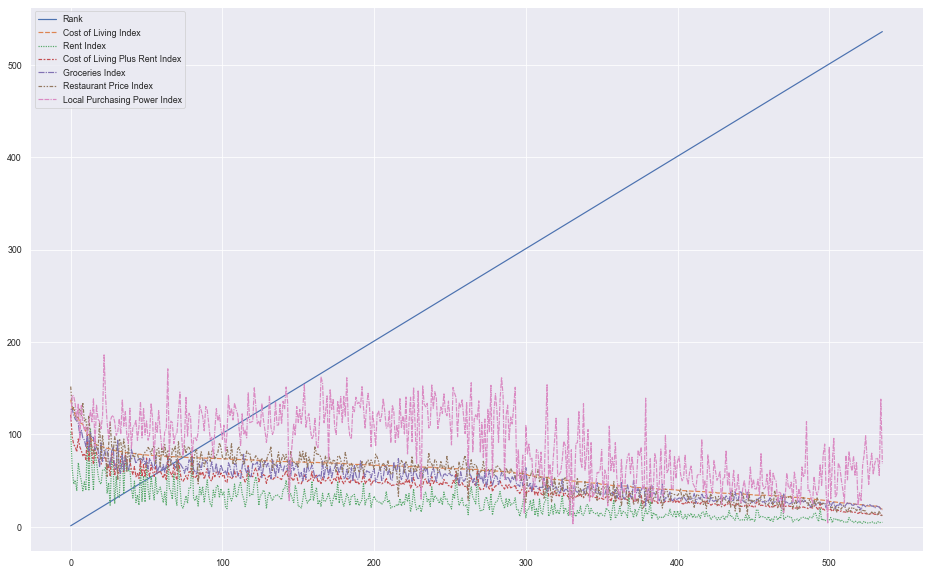

In [19]:
plt.figure(figsize=(16,10))
sns.lineplot(data=df)

# OUTLIER TREATMENT

In [20]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile (col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [21]:
for column in df.columns:
    if df[column].dtype!='object':
       UL,LL=outlier_limit(df[column])
       df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])

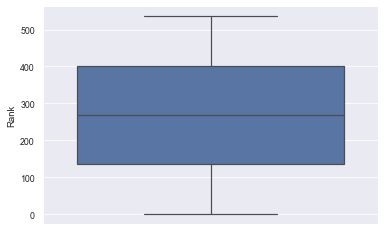

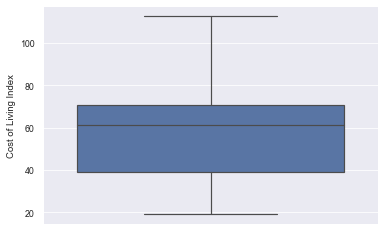

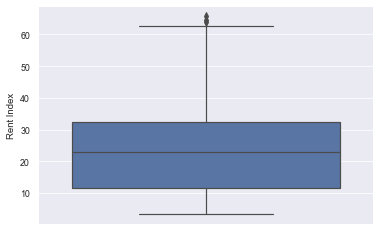

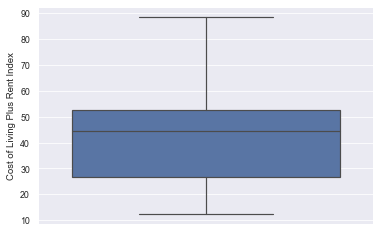

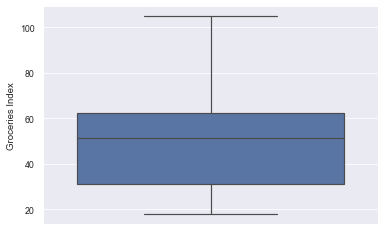

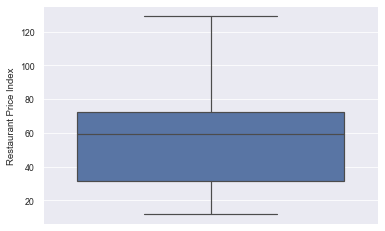

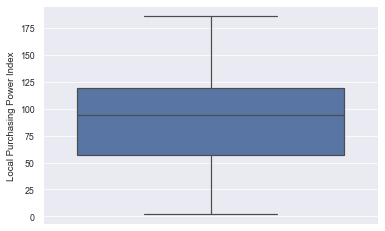

In [22]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i])
        plt.show();

In [23]:
df.isnull().mean()*100  # checking null values

Rank                              0.000000
City                              0.000000
Cost of Living Index              1.119403
Rent Index                        2.611940
Cost of Living Plus Rent Index    0.932836
Groceries Index                   1.119403
Restaurant Price Index            0.373134
Local Purchasing Power Index      0.000000
dtype: float64

In [24]:
df.dropna(inplace=True) # droping null values

In [25]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 6 to 535
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            517 non-null    float64
 1   City                            517 non-null    object 
 2   Cost of Living Index            517 non-null    float64
 3   Rent Index                      517 non-null    float64
 4   Cost of Living Plus Rent Index  517 non-null    float64
 5   Groceries Index                 517 non-null    float64
 6   Restaurant Price Index          517 non-null    float64
 7   Local Purchasing Power Index    517 non-null    float64
dtypes: float64(7), object(1)
memory usage: 36.4+ KB


# LABEL ENCODING THE COLUMN "CITY"

In [26]:
#Encoding the categorical data to numerical
le=LabelEncoder()
df["City"]=le.fit_transform(df['City'])

In [27]:
df.head()

Rank  City  Cost of Living Index  Rent Index  \
6    7.0   398                112.57       57.40   
7    8.0   278                111.88       49.58   
9   10.0   348                107.14       48.58   
10  11.0    55                102.87       39.38   
12  13.0   483                 99.73       39.87   

    Cost of Living Plus Rent Index  Groceries Index  Restaurant Price Index  \
6                            86.45            98.53                  127.87   
7                            82.39           104.85                  120.62   
9                            79.42            93.81                  114.42   
10                           72.82            87.02                  116.35   
12                           71.39            82.31                  120.45   

    Local Purchasing Power Index  
6                          94.21  
7                         131.26  
9                         104.30  
10                        108.19  
12                        113.08

# CHECKING CORRELATION USING HEATMAP

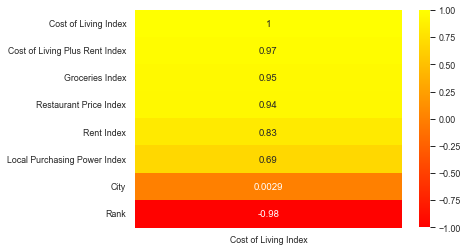

In [28]:
sns.heatmap(df.corr()[['Cost of Living Index']].sort_values(by="Cost of Living Index",
                                                ascending=False),vmin=-1,vmax=1,annot=True,cmap="autumn");

# SELECTING X & Y

In [29]:
x=df[["Groceries Index","Restaurant Price Index","Local Purchasing Power Index","Rent Index","Cost of Living Plus Rent Index"]].values

In [30]:
y=df[['Cost of Living Index']].values  #Create Y variable with target column

# Feature Scaling

In [31]:
#At first we will do Feature Scaling to shrink our data values for better result
sc=StandardScaler()

In [32]:
x=sc.fit_transform(x)

# CROSS VALIDATION

In [33]:
models={
    'LinearRegression':LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

### Checking RMSE

In [34]:
for name,model in models.items():
    scores=cross_val_score(model, x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model:{}".format(name))
    rmse=np.sqrt(-scores)
    rmse_average =np.mean(rmse)
    print("AVERAGE RMSE:",rmse_average)
    print("*"*100)

cross validation model:LinearRegression
AVERAGE RMSE: 0.006816160175863564
****************************************************************************************************
cross validation model:Ridge
AVERAGE RMSE: 0.6125896744504952
****************************************************************************************************
cross validation model:LinearSVR
AVERAGE RMSE: 0.02501329635155159
****************************************************************************************************
cross validation model:DecisionTreeRegressor
AVERAGE RMSE: 5.096060205465368
****************************************************************************************************
cross validation model:GradientBoostingRegressor
AVERAGE RMSE: 4.334132513483511
****************************************************************************************************
cross validation model:AdaBoostRegressor
AVERAGE RMSE: 6.1214326866638435
***********************************************************

######  MODEL BUILDING USING LINEAR REGRESSION

In [35]:
model=LinearRegression()  # model selecting

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) #Split the dataset first before ML creating model

In [37]:
model.fit(x_train,y_train) 

LinearRegression()

In [38]:
y_pred=model.predict(x)

# PREDICTING Y

In [39]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

ACTUAL   PREDICTED
0  112.57  112.563507
1  111.88  111.881064
2  107.14  107.141417
3  102.87  102.877848
4   99.73   99.722399

# SCATTERPLOT

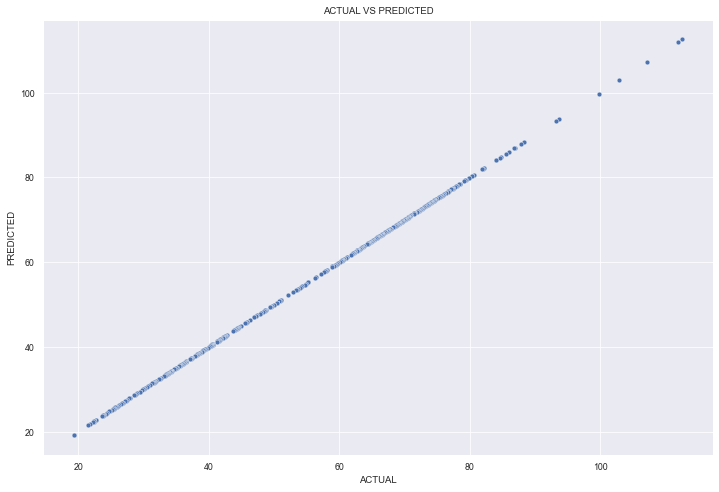

In [40]:
plt.figure(figsize=(12,8))
plt.title('ACTUAL VS PREDICTED')
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");

In [41]:
model.score(x,y)

0.9999998631747633